In [55]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [56]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [57]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [58]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-65.99835836142351 1.4601815910308176
86.79194754006107 138.82444313527992
-85.32293506849504 178.10980085430663
-78.19870221306282 -36.145374583517594
10.408427896003275 21.26033068107816
-3.0308548480939237 -97.10948414922048
64.32356612723913 63.8150225018172
44.69271447064648 166.4677627683394
-23.80156719982938 25.568303549174345
-44.719747875970214 -43.99272297285668
-57.55045002920414 143.59741545516192
-39.50987462529117 -165.86203294911266
61.31891752362071 18.031215657758707
21.737165989444463 -16.341196986274866
53.44587304939557 -3.983880087706382
-23.342572731960175 42.4621999936044
52.530253152390145 -158.97138416873048
73.90538086034175 -123.07072363199323
28.94101601103435 -86.28484053261758
58.06264299774054 74.5072735164467
-20.71354840292645 176.46422095895872
-48.399918145697676 114.58952116868392
-77.5945864083447 -162.5402331293484
71.48847916373344 -64.2915739392492
24.132973929204198 -89.53285177975326
-6.946363568951128 -126.68999528292042
-79.60783407147271 -8

-2.561827125233151 -176.6076652090078
-1.2893503260202266 -1.6190884830787695
19.32689146458452 29.16323608586478
31.24677992593476 -114.47923275808854
40.64035506386165 63.41416310507046
7.464469052997046 120.72289632719287
41.51061083350277 -96.27557692009744
-6.464782865669449 -14.857000796520651
-62.56664325018782 67.45455615520461
17.057387885193364 -157.56347649261085
42.7572304289578 -54.85423795076973
75.1163783076378 -122.84314189646335
8.672176409301983 120.9536178563618
-13.665545829020573 -132.35423273902308
-77.27848715394083 -112.31145132583374
-65.52779947015529 24.3021577033291
-65.14120128512926 -121.58538691951223
64.02629056797238 175.09987027274946
86.97221937660595 171.1985611489884
42.86112286298979 141.1644733296905
-37.35970469783926 19.74741085276017
-83.9922975071426 -90.99160437152828
-0.771084572766128 -125.7877103653835
8.362921802739478 59.29843365228294
54.885682260361506 63.9207264280291
50.329744587479354 74.37553766152806
1.1159225991978161 83.12491208

In [59]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

590

In [60]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

590

In [61]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [62]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [63]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
    
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 1 | kaitangata
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | am timan
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | igrim
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | boatlaname
City not found. Skipping...
Processing Record 10 of Set 1 | chuy
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | soderhamn
Processing Record 14 of Set 1 | nouadhibou
Processing Record 15 of Set 1 | colwyn bay
Processing Record 16 of Set 1 | toliary
City not found. Skipping...
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | norman wells
Processing Record 19 of Set 1 | panama city
Processing Record 20 of Set 1 | znamenskoye
Processing Record 21 of Set 1 | 

Processing Record 40 of Set 4 | east london
Processing Record 41 of Set 4 | san patricio
Processing Record 42 of Set 4 | luena
Processing Record 43 of Set 4 | langsa
Processing Record 44 of Set 4 | severo-kurilsk
Processing Record 45 of Set 4 | mae sai
Processing Record 46 of Set 4 | pushkino
Processing Record 47 of Set 4 | vila franca do campo
Processing Record 48 of Set 4 | kondinskoye
Processing Record 49 of Set 4 | simpang
Processing Record 50 of Set 4 | amderma
City not found. Skipping...
Processing Record 1 of Set 5 | ilulissat
Processing Record 2 of Set 5 | coahuayana
Processing Record 3 of Set 5 | estelle
Processing Record 4 of Set 5 | brunsbuttel
Processing Record 5 of Set 5 | ancuya
Processing Record 6 of Set 5 | matamoros
Processing Record 7 of Set 5 | morgan city
Processing Record 8 of Set 5 | wuzhou
Processing Record 9 of Set 5 | saskylakh
Processing Record 10 of Set 5 | marquette
Processing Record 11 of Set 5 | jilava
Processing Record 12 of Set 5 | illoqqortoormiut
City 

Processing Record 30 of Set 8 | australind
Processing Record 31 of Set 8 | camacha
Processing Record 32 of Set 8 | xuddur
Processing Record 33 of Set 8 | tacoronte
Processing Record 34 of Set 8 | semirom
Processing Record 35 of Set 8 | cidreira
Processing Record 36 of Set 8 | waiouru
Processing Record 37 of Set 8 | havelock
Processing Record 38 of Set 8 | mananjary
Processing Record 39 of Set 8 | lekoni
Processing Record 40 of Set 8 | boueni
Processing Record 41 of Set 8 | meilu
City not found. Skipping...
Processing Record 42 of Set 8 | adrar
Processing Record 43 of Set 8 | fortuna
Processing Record 44 of Set 8 | praia da vitoria
Processing Record 45 of Set 8 | iisalmi
Processing Record 46 of Set 8 | palmer
Processing Record 47 of Set 8 | barawe
City not found. Skipping...
Processing Record 48 of Set 8 | mingaora
Processing Record 49 of Set 8 | torgau
Processing Record 50 of Set 8 | lewistown
Processing Record 1 of Set 9 | palabuhanratu
City not found. Skipping...
Processing Record 2 

Processing Record 14 of Set 12 | kieta
Processing Record 15 of Set 12 | dudinka
Processing Record 16 of Set 12 | boa vista
Processing Record 17 of Set 12 | umm lajj
Processing Record 18 of Set 12 | senneterre
Processing Record 19 of Set 12 | leningradskiy
Processing Record 20 of Set 12 | bozeman
Processing Record 21 of Set 12 | palkaka
City not found. Skipping...
Processing Record 22 of Set 12 | rio gallegos
Processing Record 23 of Set 12 | gizo
Processing Record 24 of Set 12 | nelspruit
Processing Record 25 of Set 12 | lagoa
Processing Record 26 of Set 12 | asayita
City not found. Skipping...
Processing Record 27 of Set 12 | quelimane
Processing Record 28 of Set 12 | shalakusha
Processing Record 29 of Set 12 | mitu
Processing Record 30 of Set 12 | stornoway
Processing Record 31 of Set 12 | college
Processing Record 32 of Set 12 | panaba
Processing Record 33 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 34 of Set 12 | ketchikan
Processing Record 35 of Set 12 | 

In [65]:
len(city_data)

542

In [66]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hermanus,0,ZA,2023-01-13 03:53:51,84,-34.4187,19.2345,62.89,7.09
1,Kaitangata,67,NZ,2023-01-13 03:53:51,64,-46.2817,169.8464,59.97,7.54
2,Ushuaia,20,AR,2023-01-13 03:53:51,82,-54.8000,-68.3000,51.46,12.66
3,Am Timan,19,TD,2023-01-13 03:53:52,27,11.0297,20.2827,65.91,6.24
4,Puerto Ayora,62,EC,2023-01-13 03:53:52,97,-0.7393,-90.3518,73.54,5.88
5,Igrim,100,RU,2023-01-13 03:53:53,94,63.1906,64.4162,12.94,8.52
6,Nikolskoye,100,RU,2023-01-13 03:53:53,96,59.7035,30.7861,30.09,15.55
7,Chuy,88,UY,2023-01-13 03:53:53,86,-33.6971,-53.4616,67.15,6.38
8,Hobart,10,AU,2023-01-13 03:49:03,55,-42.8794,147.3294,81.27,6.85
9,Avarua,100,CK,2023-01-13 03:50:54,69,-21.2078,-159.7750,78.85,8.05


In [67]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [68]:
city_data_df = city_data_df[new_column_order]

In [69]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2023-01-13 03:53:51,-34.4187,19.2345,62.89,84,0,7.09
1,Kaitangata,NZ,2023-01-13 03:53:51,-46.2817,169.8464,59.97,64,67,7.54
2,Ushuaia,AR,2023-01-13 03:53:51,-54.8000,-68.3000,51.46,82,20,12.66
3,Am Timan,TD,2023-01-13 03:53:52,11.0297,20.2827,65.91,27,19,6.24
4,Puerto Ayora,EC,2023-01-13 03:53:52,-0.7393,-90.3518,73.54,97,62,5.88
5,Igrim,RU,2023-01-13 03:53:53,63.1906,64.4162,12.94,94,100,8.52
6,Nikolskoye,RU,2023-01-13 03:53:53,59.7035,30.7861,30.09,96,100,15.55
7,Chuy,UY,2023-01-13 03:53:53,-33.6971,-53.4616,67.15,86,88,6.38
8,Hobart,AU,2023-01-13 03:49:03,-42.8794,147.3294,81.27,55,10,6.85
9,Avarua,CK,2023-01-13 03:50:54,-21.2078,-159.7750,78.85,69,100,8.05


In [70]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [71]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

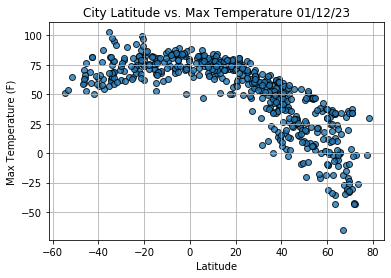

In [72]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

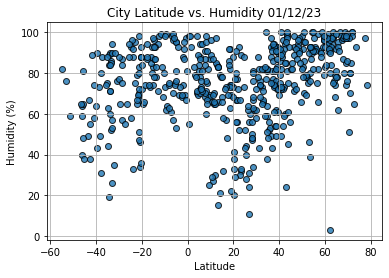

In [73]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

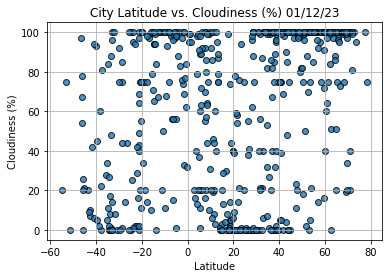

In [74]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

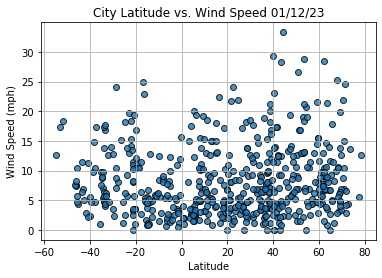

In [75]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [76]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [77]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [78]:
index13 = city_data_df.loc[13]
index13

City                       Kodiak
Country                        US
Date          2023-01-13 03:53:55
Lat                         57.79
Lng                      -152.407
Max Temp                    35.38
Humidity                       91
Cloudiness                     95
Wind Speed                   6.29
Name: 13, dtype: object

In [79]:
 # Filter a DataFrame based on a value of a row.
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4      False
5       True
6       True
7      False
8      False
9      False
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17     False
18      True
19     False
20      True
21      True
22     False
23     False
24     False
25     False
26     False
27      True
28      True
29      True
       ...  
512    False
513     True
514     True
515     True
516     True
517     True
518    False
519     True
520     True
521     True
522     True
523     True
524     True
525    False
526    False
527    False
528     True
529    False
530     True
531     True
532     True
533     True
534     True
535     True
536    False
537     True
538     True
539     True
540     True
541     True
Name: Lat, Length: 542, dtype: bool

In [80]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Am Timan,TD,2023-01-13 03:53:52,11.0297,20.2827,65.91,27,19,6.24
5,Igrim,RU,2023-01-13 03:53:53,63.1906,64.4162,12.94,94,100,8.52
6,Nikolskoye,RU,2023-01-13 03:53:53,59.7035,30.7861,30.09,96,100,15.55
10,Soderhamn,SE,2023-01-13 03:53:54,61.3037,17.0592,35.96,92,100,7.70
11,Nouadhibou,MR,2023-01-13 03:53:54,20.9310,-17.0347,62.58,67,0,12.66


In [81]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

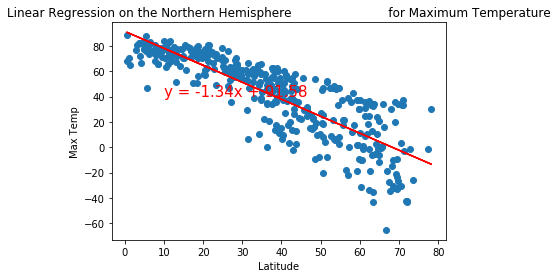

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

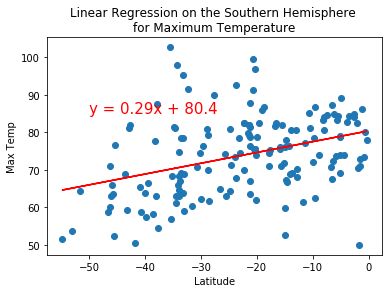

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \nfor Maximum Temperature", 'Max Temp',(-50,85))

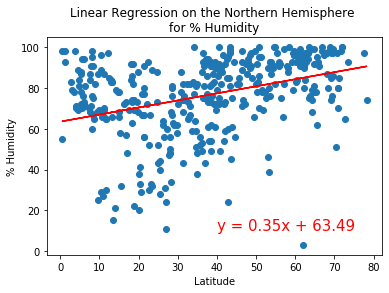

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

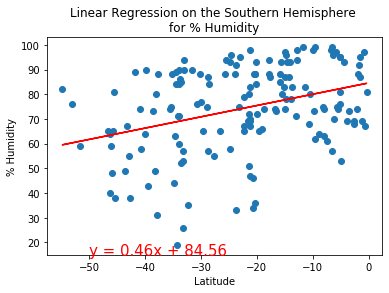

In [85]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

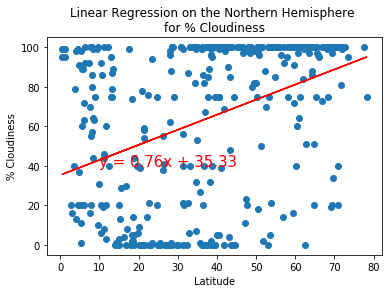

In [86]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,40))

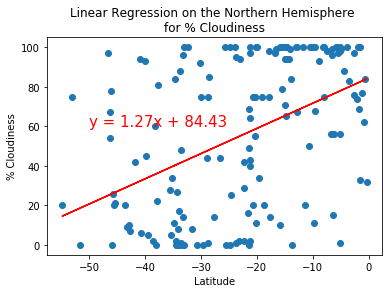

In [87]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

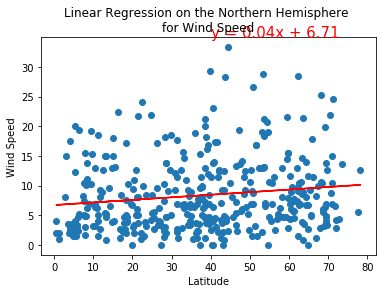

In [88]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

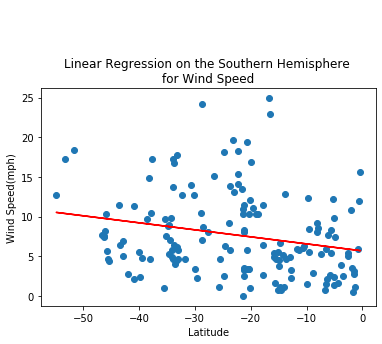

In [89]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed','Wind Speed(mph)',(-50,35))

In [91]:
conda install -c conda-forge gmaps

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [92]:
pip install gmaps

Note: you may need to restart the kernel to use updated packages.
